# Environmental Impacts by Neighborhood

## By Ashu Sangar

Data set: [Illegal Dump Sites](https://data.wprdc.org/dataset/allegheny-county-illegal-dump-sites/resource/ee834d8d-ae71-4b3b-b02b-312ba321ff17?view_id=1988368f-ec43-430c-9478-bd31164c1326)

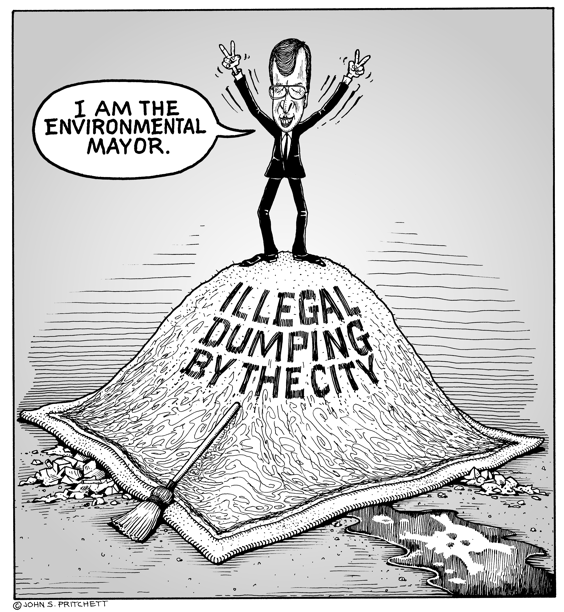

The following data will show the total of illegal garbage found in various neighborhoods in Pittsburgh. llegal dumping is the disposal of trash generated at one location and disposed of at another location without legal permission. This includes dumping yard waste, appliances, tires and other garbage in alleys, dumpsters, vacant lots and open desert locations. Before diving in, we must define what an illegal dumpsite is. It is defined as the illegal disposal of trash generated at one location and disposed of at another location without legal permission. This includes dumping yard waste, appliances, tires and other garbage in alleys, dumpsters, vacant lots and open desert locations.

In [100]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd


# load dataset

illegal_dsites = gpd.read_file('illegaldumpsites.csv')

illegal_dsites.head(3)


,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,geometry
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,,40.42221971,-79.99022525,None
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,,40.42370101,-79.98657393,None
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,,40.42427063,-79.99022675,None


We see that the neighborhood name is contained in the column labeled "Neighborhood" and the amount of garbage in tons is contained in the "estimated_tons" column. This gives us the metric that is going to be used, whichever neighborgood has the least amount of illegal garbage will be deemed the best. 

In [86]:
# In order to do this, since the Neighborhoods are in alplebetical order, we can use the groupby fuction in pandas in order to tally the total amount of garbage in each neighborhood. 

# create dataframe that simplifies given info

nb_df = pd.DataFrame(columns = ["Street", "City", "Neighborhood", "Total Garbage Tons"])

nb_df["Street"] = illegal_dsites["site_name"]
nb_df["City"] = illegal_dsites["City"]
nb_df["Neighborhood"] = illegal_dsites["Neighborhood"]
nb_df["Total Garbage Tons"] = pd.to_numeric(illegal_dsites["estimated_tons"], errors='coerce')

#display entire dataframe
print(nb_df.head())

              Street        City Neighborhood  Total Garbage Tons
0  St. Martin Street  Pittsburgh    Allentown                 0.5
1   Brosville Street  Pittsburgh    Allentown                 3.0
2      McCain Street  Pittsburgh    Allentown                 1.0
3          Ceres Way  Pittsburgh    Allentown                 0.5
4      Eureka Street  Pittsburgh    Allentown                 0.1


In [87]:
#groupby to show total garbage in each hood'
#groupby to show total tons of each neighborhood + displaying

neighborhood_totals = nb_df.groupby('Neighborhood')['Total Garbage Tons'].sum()

neighborhood_totals.head(1000)



Neighborhood
                           0.0
Allentown                 10.4
Arlington                 17.5
Avalon                     1.0
Banksville                 1.0
                          ... 
Wilkins                    2.3
Wilkins/Monroeville        1.5
Wilkinsburg                9.9
Wilkinsburg/Penn Hills     6.0
Windgap                    4.0
Name: Total Garbage Tons, Length: 153, dtype: float64

Now lets visualize the data better, the main method that would best portray the data is through bar graphs. 


Text(0, 0.5, 'Garbage in Tons')

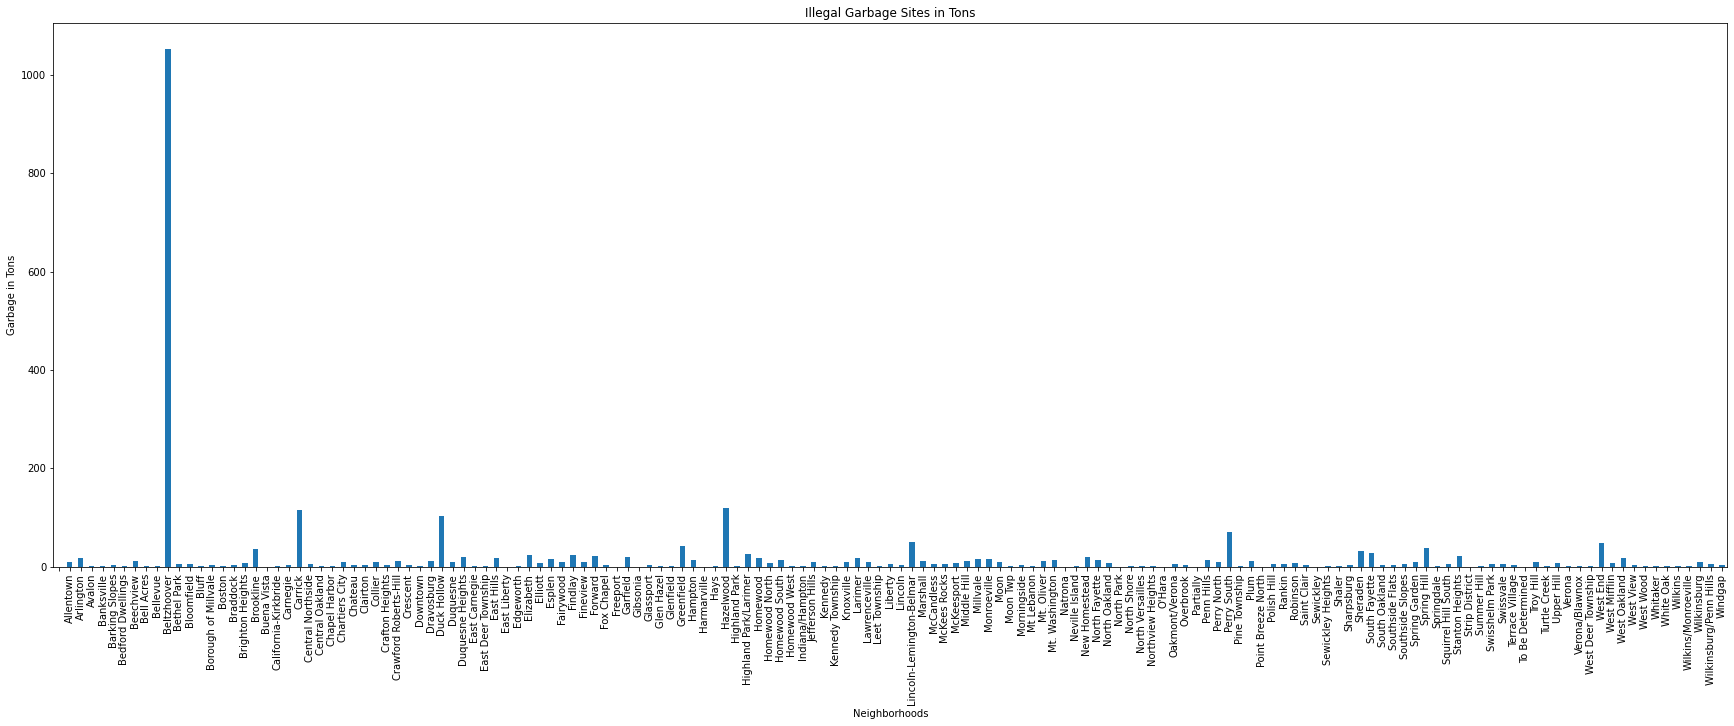

In [109]:

neighborhood_totals.plot.bar(figsize=[30,10])
plt.title("Illegal Garbage Sites in Tons")
plt.xlabel("Neighborhoods")
plt.ylabel("Garbage in Tons")

In [114]:
# its a little difficult trying to view the data like this don't you agree? Lets change the order of the bar graph so that it goes in ascending order.
